# Compare different measurements files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from lifa.licel import LicelLidarMeasurement

## Extract data from files

In [17]:
# Measurements files
# Makes average of files under same label.
files_list = {
    "sinal" : r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\arquivos ok\a*.*",
    "bkg" : r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\arquivos ok\b*.*",
    "ref" : r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\arquivos ok\a2590216.523691",
}

files_list = {
    "1": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.194507",
    "2": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.202649",
    "3": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.210793",
    "4": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.214938",
    "5": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.223082",


}
# Measurement titles
#titles = ['atmosfera']

# Licel Channels of interest
licel_channels_names = ['00355.o_an', '00355.o_ph','00395.s_an',  '00395.s_ph','00353.o_an', '00353.o_ph', '00371.o_an', '00371.o_ph', 
                        '00395.p_an', '00395.p_ph', '00460.o_an', '00460.o_ph', '00532.o_an',  '00532.o_ph','00530.o_an', '00530.o_ph']

# Get files list in each directory
measurement_files = {}
for (label, files) in files_list.items():
    measurement_files[label] = glob.glob(files)

# Read files
measurements = {}
for i,(name, files) in enumerate(measurement_files.items()):
    measurements[name] = LicelLidarMeasurement(files)
    #measurements[titles[i]] = LicelLidarMeasurement(files)

# Subset by channels
measurements_full = {}
for name, data in measurements.items():
    measurements_full[name] = data.subset_by_channels(licel_channels_names)

# Subset by bins
bin_min = 0
bin_max = 200
measurements_subset = {}
for name, data in measurements_full.items():
    measurements_subset[name] = measurements_full[name].subset_by_bins(bin_min,bin_max)

# Average measurements on a channel 
measurements_average = {}
for name, data in measurements_subset.items():
    signal = []
    for channel_name, channel in measurements_subset[name].channels.items():
        signal.append([channel.z, channel.average_profile()])
        distance = channel.z
    signal = np.array(signal)
    measurements_average[name] = signal

## Plot averages

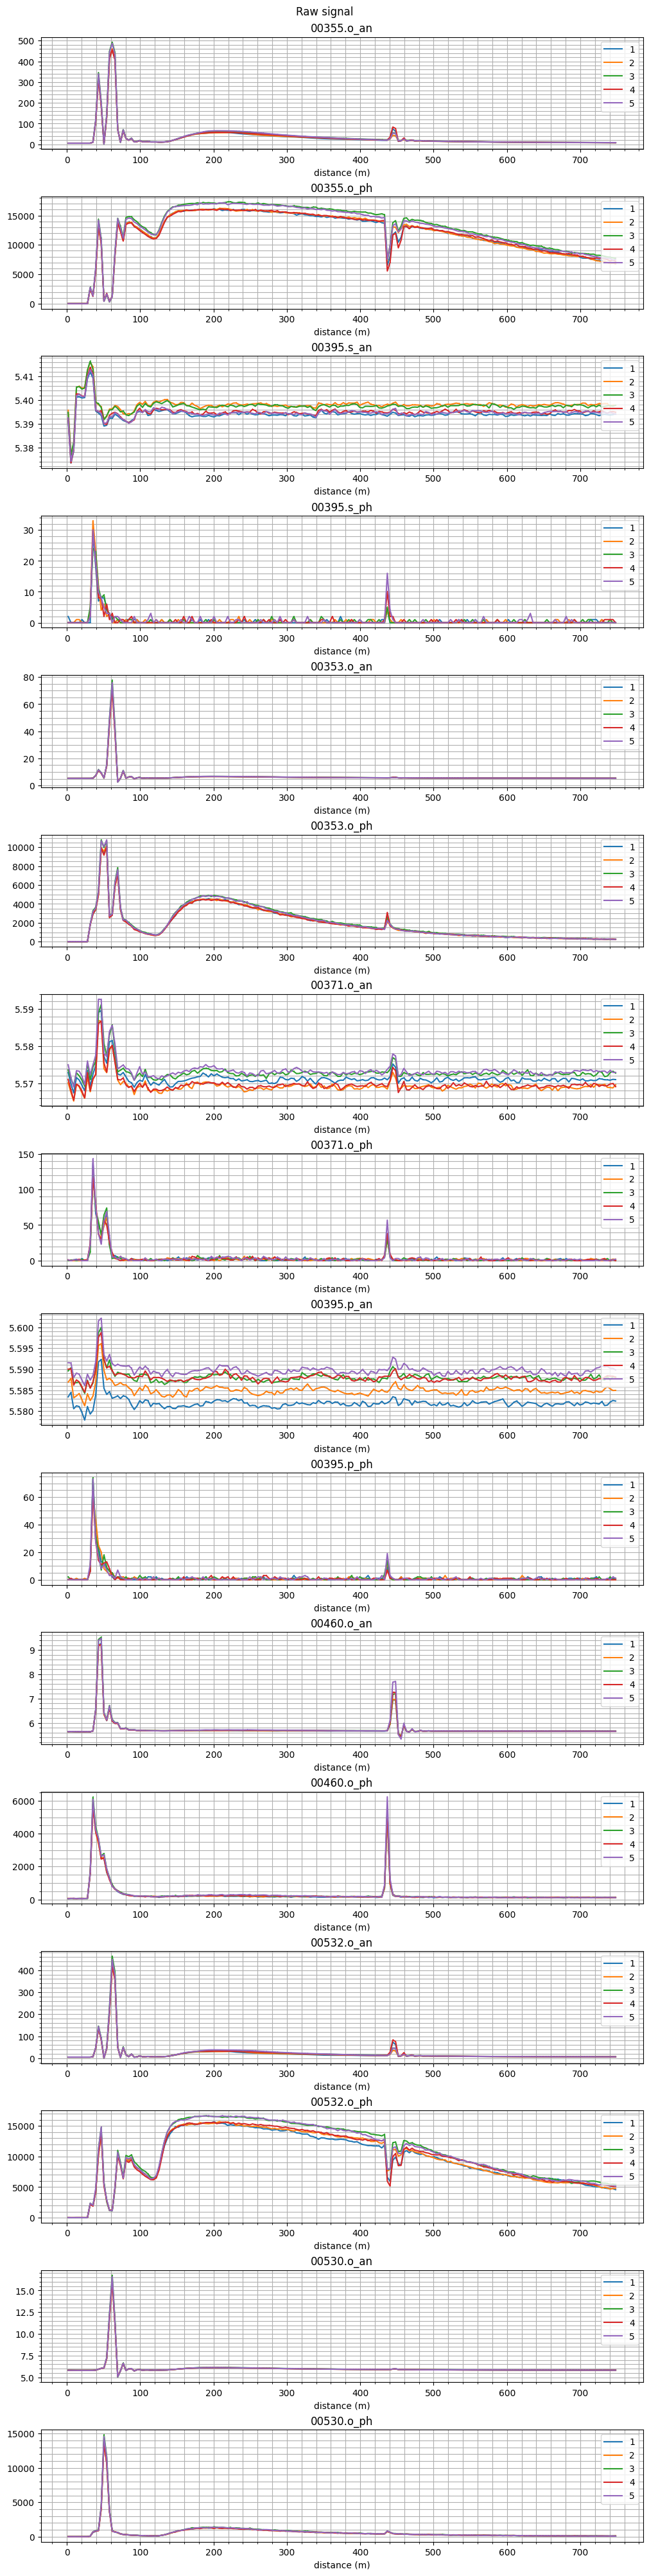

In [20]:
number_traces = len(licel_channels_names)
fig, ax = plt.subplots(nrows=number_traces, figsize=(10,40), layout='constrained')
fig.suptitle('Raw signal')
for name, data in measurements_average.items():
    for i,trace in enumerate(measurements_average[name]):
        ax[i].plot(trace[0], trace[1], label=name, marker=',')
        ax[i].set_title(licel_channels_names[i])
        ax[i].grid(True, 'both')
        ax[i].minorticks_on()
        ax[i].set_xlabel('distance (m)')
        #ax[i].set_ylabel('signal (mV)')
        ax[i].legend(loc='upper right')

## Save to a file

In [4]:
fig.savefig('atmosfera.png')